## Word Embedding

In [ ]:
import re
import urllib.request

from lxml import etree #텍스트 parser
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
#data 가져오기 (해당파일을 text로 가져온다.)
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x79b4f7854520>)

In [ ]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# xml: 일반적인 웹 페이지를 만들 때 사용하는 구조화 된 언어
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8') # - 단어의 의미, 문장의 의미를 부여 혹은검색이 가능하다. (지능화된 검색을 하게 해주는 format)
target_text = etree.parse(targetXML) # etree로 parsing

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()')) #<content> 태그 안에 있는 문장만 가져온다.

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
result #단어 단위 토큰화 결과 (2중 list 구조)

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing'],
 ['consider', 'facit'],
 ['i', 'm', 'actually', 'old', 'enough', 'to', 'remember', 'them'],
 ['facit', 'was', 'a', 'fantastic', 'company'],
 ['they',
  'were',
  'born',
  'deep',
  'in',
  'the',
  'swedish',
  'forest',
  'and',
  'they',
  'made',
  'the',
  'best',
  'mechanical',
  'calculators',
  'in',
  'the',
  'world'],
 ['everybody', 'used', 'them'],
 ['and',
  'what',
  'did',
  'facit',
  'do',
  'when',
  'the',
  'electronic',
  'calcu

In [ ]:
len(result)

273424

In [ ]:
result[0]

['here',
 'are',
 'two',
 'reasons',
 'companies',
 'fail',
 'they',
 'only',
 'do',
 'more',
 'of',
 'the',
 'same',
 'or',
 'they',
 'only',
 'do',
 'what',
 's',
 'new']

딥러닝 Let's Go

In [ ]:
from gensim.models import Word2Vec #임베딩
from gensim.models import KeyedVectors
# sg: skip Gram이 아니라 Cbow (중심단어로 주변 단어를 예측하는 것) / 전체적으로 5번 이상 언급된 단어만 Embedding
model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model.wv.most_similar('man') #man 벡터와 가장 가까운, cosine 유사도가 가장 큰 단어들이 출력된다.

[('woman', 0.8386567831039429),
 ('guy', 0.8188833594322205),
 ('boy', 0.7805977463722229),
 ('lady', 0.7757325768470764),
 ('girl', 0.7471595406532288),
 ('soldier', 0.7360873222351074),
 ('gentleman', 0.7257105112075806),
 ('poet', 0.7117534875869751),
 ('kid', 0.7110428810119629),
 ('friend', 0.6700727939605713)]

In [ ]:
model.wv.most_similar('everyone')

[('everybody', 0.9240575432777405),
 ('nobody', 0.7535603642463684),
 ('somebody', 0.7486794590950012),
 ('anyone', 0.7340686321258545),
 ('someone', 0.7286269664764404),
 ('anybody', 0.6985303163528442),
 ('everything', 0.5655576586723328),
 ('nothing', 0.5310316681861877),
 ('whoever', 0.5190737247467041),
 ('person', 0.5137773752212524)]

In [ ]:
model.wv.most_similar('companies')

[('businesses', 0.7921127080917358),
 ('organizations', 0.7719426155090332),
 ('jobs', 0.7591309547424316),
 ('programs', 0.7548461556434631),
 ('teams', 0.7510073781013489),
 ('institutions', 0.7169490456581116),
 ('governments', 0.7106097340583801),
 ('workers', 0.7009357213973999),
 ('farmers', 0.6996573805809021),
 ('groups', 0.6959791779518127)]

## 한국어 Model 생성

In [ ]:
#한국어 word2Vector Model 생성
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt") #영화 리뷰 + 평점

('ratings.txt', <http.client.HTTPMessage at 0x7fb6c0477340>)

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_table('ratings.txt')
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [ ]:
#Null 값 제거
train_data[train_data['document'].isnull()]
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [ ]:
# train_data['document'].str.replace("포켓", "포겟")
# 한국어 혹은 공백이 아니면 다 지워버린다.
train_data['document'] = train_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")

<ipython-input-35-bb87f6bd725a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")


In [ ]:
train_data['document'].info()

<class 'pandas.core.series.Series'>
Int64Index: 199992 entries, 0 to 199999
Series name: document
Non-Null Count   Dtype 
--------------   ----- 
199992 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [ ]:
train_data['document'].isnull().sum()

0

In [ ]:
len(train_data)

199992

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 45.2 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
tok_data = []
for sent in train_data['document']:
  tok_sent = okt.morphs(sent) #토큰화
  #단어가 불용어에 없으면 리스트에 추가한다.
  sw_rem_sent = [w for w in tok_sent if not w in stopwords] #w가 stopwords에 없으면 사용하기
  tok_data.append(sw_rem_sent)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#리뷰 최대 길이
print(max(len(r) for r in tok_data))

72


(array([7.5880e+03, 8.4390e+03, 2.7314e+04, 1.6470e+04, 3.0483e+04,
        1.3162e+04, 2.2553e+04, 9.6740e+03, 8.5700e+03, 1.3336e+04,
        4.9690e+03, 6.7530e+03, 2.4200e+03, 3.9290e+03, 1.6370e+03,
        2.9550e+03, 1.2640e+03, 1.2950e+03, 2.2320e+03, 1.0070e+03,
        1.7840e+03, 8.0800e+02, 1.5860e+03, 7.1000e+02, 7.3000e+02,
        1.4190e+03, 7.3200e+02, 1.5280e+03, 7.6700e+02, 1.4310e+03,
        6.2100e+02, 8.3800e+02, 2.5000e+02, 2.1500e+02, 2.5900e+02,
        8.0000e+01, 7.3000e+01, 2.7000e+01, 3.3000e+01, 1.4000e+01,
        1.7000e+01, 0.0000e+00, 5.0000e+00, 1.0000e+01, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.  ,  1.44,  2.88,  4.32,  5.76,  7.2 ,  8.64, 10.08, 11.52,
        12.96, 14.4 , 15.84, 17.28, 18.72, 20.16, 21.6 , 23.04, 24.48,
        25.92, 27.36, 28.8 , 30.24, 31.68, 33.12, 34.56, 36.  , 37.44,
        38.88, 40.32, 41.76, 43.2 , 44.64, 46.08, 47.52, 48.96, 50.4 ,
        51.84, 53.28, 54.72, 56.16

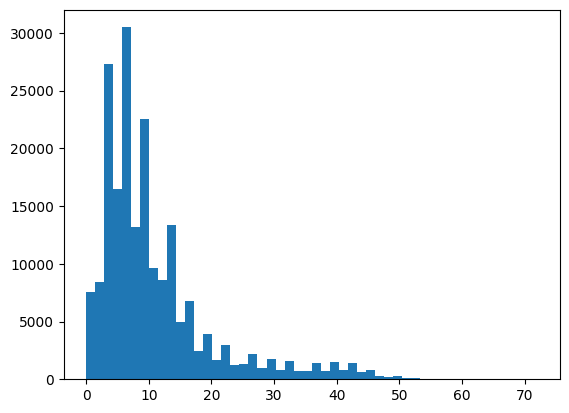

In [ ]:
plt.hist([len(r) for r in tok_data], bins = 50) #50개 단위로 시각화

In [ ]:
#데이터 상태, 작업환경을 고려해서 설계한다. (성능평가를 통해 가장 성능이 좋은 parameter들을 가지고 학습을 한다.)
model = Word2Vec(sentences=tok_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model.wv.vectors.shape

(26194, 100)

In [ ]:
model.wv.most_similar("아이폰") #특정 데이터 넣어주기

[('너무한거', 0.8589445352554321),
 ('코디', 0.8320325016975403),
 ('치히로', 0.83176589012146),
 ('육', 0.8299747109413147),
 ('쩌리', 0.8259861469268799),
 ('재팬', 0.823350727558136),
 ('시저', 0.8229659795761108),
 ('ㅉㅉㅉㅉ', 0.8205859065055847),
 ('곱등이', 0.8191049695014954),
 ('킬빌', 0.8169358372688293)]

word2vector, 글로브, 페스트텍스트, 엘모

→ 트랜스포머
→ GPT/BERT

In [ ]:
from gensim.models import FastText

In [ ]:
#영어 모델 사용
model = FastText(result, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 1)

In [ ]:
model.wv.most_similar("how")

[('anyhow', 0.6343173384666443),
 ('why', 0.6208069324493408),
 ('what', 0.6056464910507202),
 ('so', 0.5675362944602966),
 ('xml', 0.5523863434791565),
 ('mw', 0.5521855354309082),
 ('jd', 0.5458670258522034),
 ('whatnot', 0.5405486822128296),
 ('jm', 0.5403879880905151),
 ('pjc', 0.5399295687675476)]

### LSTM 분류기

응용면에서 BERT 사용하기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
#web에 있는 csv file 다운로드 받기
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/10.%20RNN%20Text%20Classification/dataset/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


### **LSTM Algorithms Modeling**

1. 5572건의 data를 Train/Test로 나눈다.

2. Mail 제목으로 Spam인지, 일반 Mail인지 알아보기

**[분류 Algorithms]**

Descion Tree =

분리 전과 후의 차이 = Information Gain (정보 획득량)

= Entropy, Gini 계수, Log Loss  

→ 이를 통해 복잡도를 점점 낮춰간다.

but, 단어가 5,000개 정도 있으면 Gini 계수를 구하는 것(5,000번 수행)은 시간이 너무 오래 걸린다.
또한, 대부분 0이기 때문에 의미도 없다.

결국, 자연어 처리할 때 Decision Tree, Random Forest는 사용하는 것이 아니다.

Linear Regression 사용 불가

SVM은 가능함? → SVM을 사용하여 감정 분석, 텍스트 간 유사도, 등에서 사용할 수 있다.


In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
del data['Unnamed: 2']

In [6]:
del data['Unnamed: 3']

In [7]:
del data['Unnamed: 4']

In [8]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
data.columns = ['label', 'title']
data

,label,title
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
data.info() #결측값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   title   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
#스팸: 747건, 일반메일: 4825건
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [12]:
 #메일의 제목이 동일한게 400여개 정도 있다.
data['title'].nunique()

5169

In [13]:
#중복열 제거
data.drop_duplicates(subset = ['title'], inplace = True)

In [14]:
len(data['title'])

5169

**[데이터의 불균형이 심할 때 사용하는 방법]**

**UpSampling**

데이터가 적은 곳에서 추가하는 것

**UnderSampling**

데이터가 많은 쪽에서 줄이는 것

**[예시]**

Meta Learning: 적은 이미지로 학습시킬 때

Few Shot Learning: 동일

In [18]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [21]:
#series 형식을 list 형식으로 변경해준다.
comment = data['title'].tolist()

In [24]:
#문장 토큰화
tok_sent = [nltk.word_tokenize(sent) for sent in comment]
tok_sent

[['Go',
  'until',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'only',
  'in',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'there',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  'in',
  '2',
  'a',
  'wkly',
  'comp',
  'to',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  'to',
  '87121',
  'to',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  'T',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U',
  'dun',
  'say',
  'so',
  'early',
  'hor',
  '...',
  'U',
  'c',
  'already',
  'then',
  'say',
  '...'],
 ['Nah',
  'I',
  'do',
  "n't",
  'think',
  'he',
  'goes',
  'to',
  'usf',
  ',',
  'he',
  'lives',
  'around',
  'here',
  'though'],
 ['FreeMsg',
  'Hey',
  'there',
  'darling',
  'it',
  "'s",
  'been',
  '3',
  'week',
  "'s"

In [25]:
#불용어 제거
filter_sent = [[word for word in sent if word.lower() not in stop_words] for sent in tok_sent]
filter_sent

[['Go',
  'jurong',
  'point',
  ',',
  'crazy',
  '..',
  'Available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  '...',
  'Cine',
  'got',
  'amore',
  'wat',
  '...'],
 ['Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...'],
 ['Free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'FA',
  'Cup',
  'final',
  'tkts',
  '21st',
  'May',
  '2005',
  '.',
  'Text',
  'FA',
  '87121',
  'receive',
  'entry',
  'question',
  '(',
  'std',
  'txt',
  'rate',
  ')',
  '&',
  'C',
  "'s",
  'apply',
  '08452810075over18',
  "'s"],
 ['U', 'dun', 'say', 'early', 'hor', '...', 'U', 'c', 'already', 'say', '...'],
 ['Nah', "n't", 'think', 'goes', 'usf', ',', 'lives', 'around', 'though'],
 ['FreeMsg',
  'Hey',
  'darling',
  "'s",
  '3',
  'week',
  "'s",
  'word',
  'back',
  '!',
  "'d",
  'like',
  'fun',
  'still',
  '?',
  'Tb',
  'ok',
  '!',
  'XxX',
  'std',
  'chgs',
  'send',
  ',',
  'å£1.50',
  'rcv'],
 ['Even',
  'brother',
  'like',
  'speak',
  '.',
  '

In [ ]:
#리스트 다시 묶기
sw_rw_sent = [" ".join(sent) for sent in filter_sent]

sw_rw_sent

In [ ]:
#수치적으로 나타나기 위해 스팸은 1로, 일반은 0으로 변경해준다.
data['label']=data['label'].replace(['ham','spam'],[0,1])

In [ ]:
#test, train data split
ydata = data['label']
xdata = sw_rw_sent

In [ ]:
ydata

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [ ]:
#random_state: 어떻게 나눌 것인가? (동일하게) - randomd에 값을 안 주면 train, test 데이터가 계속 계속 변한다.
#stratifiy: 데이터를 균등하게 나누는 것
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size = 0.2, random_state = 20230728, stratify= ydata)

In [ ]:
len(xtrain)

4135

In [ ]:
len(xtest)

1034

In [ ]:
xtrain

[". 's currently scotland .",
 'da . happy sit together na',
 "1000 's girls many local 2 u r virgins 2 & r ready 2 4fil ur every sexual need . u 4fil ? text CUTE 69911 ( å£1.50p . )",
 'Thank u . BETTER WORK CAUSE FEEL USED OTHERWISE',
 'Missed call alert . numbers called left message . 07008009200',
 'time u get ?',
 'Arun u transfr amt',
 "Oh , love , 's soooo good hear . Omg missed much today . 'm sorry problems provider thank tming",
 'Send id password',
 'Oh ok prob ..',
 "'s ur pin ?",
 'wonderful Okors , great month . cherish guys wish well day . MojiBiola',
 'FreeMsg : Txt : CALL : 86888 & claim reward 3 hours talk time use phone ! Subscribe6GBP/mnth inc 3hrs 16 stop ? txtStop',
 'walked moms . Right stagwood pass right winterstone left victors hill . Address & lt ; # & gt ;',
 'felt ... conveying reason .. Ese ... ?',
 'anyways , go gym whatever , love * smiles * hope ok good day babe ... miss much already',
 "\\Hi darlin youPhone ? Im atHome youwanna chat.\\ '' ''",
 'U atte

In [ ]:
#스팸메일 4825건, 메일 747건 - 타겟의 불균형
#해결: 층화추출 (종류에 따라 균등하게 분리하여 추출)
ytrain.value_counts()

0    3613
1     522
Name: label, dtype: int64

In [ ]:
tok = Tokenizer()

In [ ]:
tok.fit_on_texts(xtrain) #xtrain을 코퍼스로 하여 fitting

In [ ]:
#단어별 index 부여
xtrain_enc = tok.texts_to_sequences(xtrain)

In [ ]:
xtrain_enc

[[3, 815, 1684],
 [36, 66, 1029, 439, 58],
 [1030,
  3,
  501,
  141,
  1031,
  4,
  1,
  34,
  3374,
  4,
  34,
  207,
  4,
  2212,
  8,
  138,
  3375,
  29,
  1,
  2212,
  26,
  1032,
  3376,
  242,
  1380],
 [264, 1, 168, 81, 468, 127, 633, 1033],
 [365, 2, 1381, 816, 292, 256, 109, 3377],
 [22, 1, 5],
 [2213, 1, 3378, 2214],
 [57, 25, 3, 3379, 19, 230, 901, 365, 59, 43, 6, 42, 1382, 3380, 264, 3381],
 [28, 440, 1187],
 [57, 12, 584],
 [3, 8, 1383],
 [634, 3382, 63, 213, 3383, 231, 182, 60, 24, 2215],
 [635,
  35,
  2,
  2216,
  69,
  902,
  113,
  502,
  191,
  22,
  188,
  52,
  2217,
  2218,
  903,
  2219,
  196,
  40,
  2220],
 [1685, 1384, 83, 3384, 817, 83, 3385, 256, 3386, 2221, 421, 10, 11],
 [736, 3387, 636, 3388],
 [1385, 13, 678, 503, 25, 1686, 67, 12, 19, 24, 98, 107, 59, 74],
 [47, 637, 3389, 89, 3390, 3391, 145, 18, 18],
 [1, 1386, 8, 381, 543, 141, 344, 232, 50, 24],
 [635,
  2222,
  737,
  3392,
  67,
  1,
  17,
  4,
  124,
  585,
  1034,
  15,
  1387,
  1687,
  79,


In [ ]:
tok.word_index

{'u': 1,
 'call': 2,
 "'s": 3,
 '2': 4,
 'get': 5,
 "'m": 6,
 "n't": 7,
 'ur': 8,
 '4': 9,
 'lt': 10,
 'gt': 11,
 'ok': 12,
 'go': 13,
 'free': 14,
 'got': 15,
 'know': 16,
 'like': 17,
 "''": 18,
 'good': 19,
 'come': 20,
 "'ll": 21,
 'time': 22,
 'want': 23,
 'day': 24,
 'love': 25,
 'text': 26,
 'one': 27,
 'send': 28,
 'need': 29,
 'going': 30,
 'home': 31,
 'still': 32,
 'see': 33,
 'r': 34,
 'txt': 35,
 'da': 36,
 'back': 37,
 'lor': 38,
 'k': 39,
 'stop': 40,
 'reply': 41,
 'sorry': 42,
 'today': 43,
 'take': 44,
 'think': 45,
 'dont': 46,
 'hi': 47,
 'tell': 48,
 'new': 49,
 'n': 50,
 'please': 51,
 'phone': 52,
 'mobile': 53,
 'ì': 54,
 'hey': 55,
 'night': 56,
 'oh': 57,
 'na': 58,
 'much': 59,
 'well': 60,
 'c': 61,
 'wat': 62,
 'great': 63,
 'week': 64,
 'pls': 65,
 'happy': 66,
 'hope': 67,
 'later': 68,
 'claim': 69,
 'give': 70,
 '1': 71,
 'yes': 72,
 'make': 73,
 'already': 74,
 'way': 75,
 'msg': 76,
 'dear': 77,
 'e': 78,
 'wan': 79,
 'number': 80,
 'work': 81,
 'tomo

In [ ]:
w2i = tok.word_index

In [ ]:
len(w2i)

7648

In [ ]:
vocab_size = len(w2i) + 1 #1번부터 단어가 부여되었지만, padding은 0번 index가 존재하기 때문에 1을 더해줘서 길이를 맞춘다.
vocab_size

7649

In [ ]:
#최대 길이 조사 (padding을 하기 위함)
ml = max(len(w) for w in xtrain_enc)

In [ ]:
# xtrain_enc변수에 들어있는 값들에 대해서 len을 조사해라 / 길이로 나누면 평균길이가 나온다.
sum(map(len, xtrain_enc))/len(xtrain_enc)

9.762756952841595

In [ ]:
max(map(len, xtrain_enc))

78

In [ ]:
min(map(len, xtrain_enc)) #일단 무시..

0

In [ ]:
#Padding
xtrain_padded = pad_sequences(xtrain_enc, maxlen = ml)
xtrain_padded

array([[   0,    0,    0, ...,    3,  815, 1684],
       [   0,    0,    0, ..., 1029,  439,   58],
       [   0,    0,    0, ..., 3376,  242, 1380],
       ...,
       [   0,    0,    0, ..., 7648,   82, 1798],
       [   0,    0,    0, ...,    0,   12,  584],
       [   0,    0,    0, ...,   20,   68,  120]], dtype=int32)

In [ ]:
#모듈을 위한 class import
xtrain_padded.shape

(4135, 78)

In [ ]:
#RNN 만들기
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(100))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain_padded, ytrain, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
102/104 [============================>.] - ETA: 0s - loss: 0.4599 - accuracy: 0.8058

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x79b4d337eb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x79b4d337eb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/104 [==============================] - 6s 39ms/step - loss: 0.4587 - accuracy: 0.8065 - val_loss: 0.3541 - val_accuracy: 0.8682
Epoch 2/5
104/104 [==============================] - 3s 26ms/step - loss: 0.2044 - accuracy: 0.9169 - val_loss: 0.1440 - val_accuracy: 0.9553
Epoch 3/5
104/104 [==============================] - 3s 28ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0722 - val_accuracy: 0.9758
Epoch 4/5
104/104 [=========

In [ ]:
xtest_enc = tok.texts_to_sequences(xtest)

In [ ]:
xtest_padded = pad_sequences(xtest_enc, maxlen = ml)

In [ ]:
model.evaluate(xtest_padded,ytest)
model.evaluate(xtest_padded,ytest)[1]

33/33 [==============================] - 0s 7ms/step - loss: 0.0965 - accuracy: 0.9797


0.9796905517578125

#### 과제

단어에 대한 전처리 (모델 성능 개선)

1. 불용어 제거하기

2. 자연어 처리 성능 개선 검색해보기